### This file plots the processed csv files with matplotlib

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import numpy as np
import pandas as pd

## Adjust date of processed csv files

In [22]:
date = '2018-11-04_00h57'
worker_list = [8,16,32,64]
base_path = '/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/one_mw/' + date + '/'

## Throughput plot for read loads

In [45]:
# read data into pandas dataframe
df_tp = pd.read_csv(base_path + 'one_mw_tp.csv')
df_tp

,client,worker,write_tp_mean,write_tp_std,read_tp_mean,read_tp_std
0,6,8,2788.857143,59.424180,2760.214286,47.761385
1,6,16,2746.523810,61.594065,2763.404762,32.542431
2,6,32,2659.066667,7.445953,2742.571429,28.026656
3,6,64,2683.085714,16.604184,2707.871429,27.005459
4,24,8,6285.414286,409.995600,2960.033333,2.040419
5,24,16,6248.847619,410.072034,2962.871429,2.575341
6,24,32,6349.523810,155.182241,2964.523810,1.481373
7,24,64,6447.314286,55.672911,2964.390476,1.979017
8,48,8,6616.909524,177.136041,2964.047619,1.603242
9,48,16,7342.052381,103.361670,2969.147619,0.671716


In [46]:
def y_fmt(tick_val, pos):
    if tick_val > 1000000:
        val = int(tick_val)/1000000
        return str(val).rstrip('0') + ' M'
    elif tick_val >= 1000:
        val = int(tick_val) / 1000
        return str(val).rstrip('0') + ' k'
    else:
        return tick_val

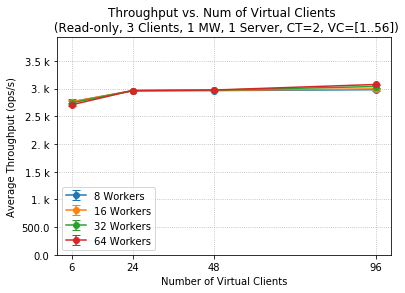

In [47]:
f = plt.figure()
plt.title("Throughput vs. Num of Virtual Clients \n (Read-only, 3 Clients, 1 MW, 1 Server, CT=2, VC=[1..56])")

for worker in worker_list:
    # extract values of interest
    df_tp_cut = df_tp[(df_tp.worker == worker)]
    
    vcs = df_tp_cut['client']
    tps = df_tp_cut['read_tp_mean']
    std = df_tp_cut['read_tp_std']
    
    plt.errorbar(x = vcs, y = tps, yerr = std, label = "{} Workers".format(worker), capsize = 4, marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("Average Throughput (ops/s)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0,top=1e3+np.mean(df_tp['read_tp_mean']))
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/one_mw/"+date+"/one_mw_tp_read.png", dpi = 150)


## Throughput plot for write loads

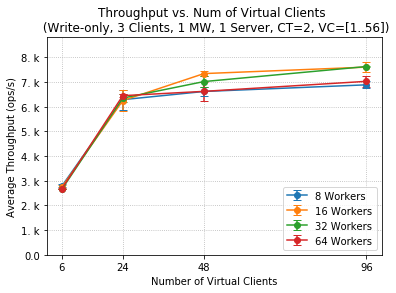

In [48]:
f = plt.figure()
plt.title("Throughput vs. Num of Virtual Clients \n (Write-only, 3 Clients, 1 MW, 1 Server, CT=2, VC=[1..56])")

for worker in worker_list:
    # extract values of interest
    df_tp_cut = df_tp[(df_tp.worker == worker)]
    
    vcs = df_tp_cut['client']
    tps = df_tp_cut['write_tp_mean']
    std = df_tp_cut['write_tp_std']
    
    plt.errorbar(x = vcs, y = tps, yerr = std, label = "{} Workers".format(worker), capsize = 4, marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("Average Throughput (ops/s)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0,top=3e3+np.mean(df_tp['write_tp_mean']))
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/one_mw/"+date+"/one_mw_tp_write.png", dpi = 150)


## Response-time plot for read loads

In [49]:
# read data into pandas dataframe
df_rt = pd.read_csv(base_path + 'one_mw_rt.csv')
df_rt

,client,worker,write_rt_mean,write_rt_std,read_rt_mean,read_rt_std
0,6,8,1.127357,0.023260,1.083395,0.021508
1,6,16,1.163938,0.032050,1.098290,0.009252
2,6,32,1.220297,0.006516,1.118752,0.003769
3,6,64,1.201903,0.010323,1.127338,0.012261
4,24,8,2.380655,0.116121,6.870537,0.008602
5,24,16,1.896448,0.041955,6.704221,0.029748
6,24,32,1.905644,0.016113,6.737971,0.039561
7,24,64,1.915786,0.013714,6.724890,0.033390
8,48,8,5.666548,0.066815,14.928585,0.029748
9,48,16,3.149743,0.063727,14.596594,0.043190


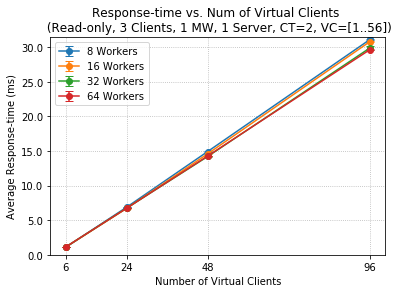

In [50]:
f = plt.figure()
plt.title("Response-time vs. Num of Virtual Clients \n (Read-only, 3 Clients, 1 MW, 1 Server, CT=2, VC=[1..56])")

for worker in worker_list:
    # extract values of interest
    df_rt_cut = df_rt[(df_rt.worker == worker)]
    
    vcs = df_rt_cut['client']
    tps = df_rt_cut['read_rt_mean']
    std = df_rt_cut['read_rt_std']
    
    plt.errorbar(x = vcs, y = tps, yerr = std, label = "{} Workers".format(worker), capsize = 4, marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("Average Response-time (ms)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0, top=np.max(df_rt['read_rt_mean'])+0.3)
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/one_mw/"+date+"/one_mw_rt_read.png", dpi = 150)


## Response-time plot for write loads

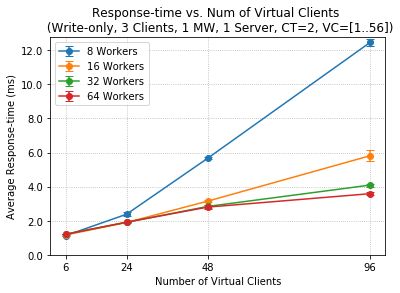

In [51]:
f = plt.figure()
plt.title("Response-time vs. Num of Virtual Clients \n (Write-only, 3 Clients, 1 MW, 1 Server, CT=2, VC=[1..56])")

for worker in worker_list:
    # extract values of interest
    df_rt_cut = df_rt[(df_rt.worker == worker)]
    
    vcs = df_rt_cut['client']
    tps = df_rt_cut['write_rt_mean']
    std = df_rt_cut['write_rt_std']
    
    plt.errorbar(x = vcs, y = tps, yerr = std, label = "{} Workers".format(worker), capsize = 4, marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("Average Response-time (ms)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0, top=np.max(df_rt['write_rt_mean'])+0.3)
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/one_mw/"+date+"/one_mw_rt_read.png", dpi = 150)


## Queue length plot for read loads

In [52]:
# read data into pandas dataframe
df_ql = pd.read_csv(base_path + 'one_mw_queuelength.csv')
df_ql

,client,worker,read_queueLength,read_queueLength_std,write_queueLength,write_queueLength_std
0,6,8,1.452721,0.050648,1.288984,0.026036
1,6,16,1.417311,0.019134,1.256502,0.012254
2,6,32,1.357749,0.036570,1.258134,0.009933
3,6,64,1.387656,0.009855,1.231737,0.016024
4,24,8,9.275894,0.098550,7.317418,0.041596
5,24,16,4.067398,0.019117,3.647401,0.095195
6,24,32,5.500001,0.163901,3.744757,0.058962
7,24,64,5.530615,0.192194,3.822987,0.052556
8,48,8,32.876146,0.110154,29.251134,0.501932
9,48,16,19.391822,0.314660,10.815630,0.305462


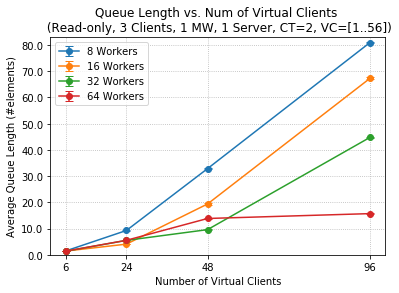

In [53]:
f = plt.figure()
plt.title("Queue Length vs. Num of Virtual Clients \n (Read-only, 3 Clients, 1 MW, 1 Server, CT=2, VC=[1..56])")

for worker in worker_list:
    # extract values of interest
    df_ql_cut = df_ql[(df_ql.worker == worker)]
    
    vcs = df_ql_cut['client']
    tps = df_ql_cut['read_queueLength']
    std = df_ql_cut[' read_queueLength_std']
    
    plt.errorbar(x = vcs, y = tps, yerr = std, label = "{} Workers".format(worker), capsize = 4, marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("Average Queue Length (#elements)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0, top=np.max(df_ql['read_queueLength'])+2)
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/one_mw/"+date+"/one_mw_queuelength_read.png", dpi = 150)


## Queue length plot for write loads

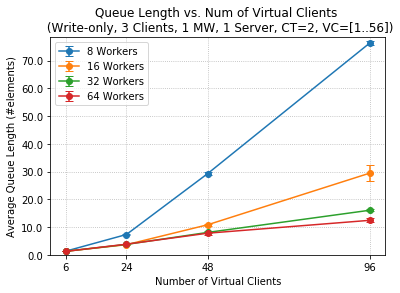

In [54]:
f = plt.figure()
plt.title("Queue Length vs. Num of Virtual Clients \n (Write-only, 3 Clients, 1 MW, 1 Server, CT=2, VC=[1..56])")

for worker in worker_list:
    # extract values of interest
    df_ql_cut = df_ql[(df_ql.worker == worker)]
    
    vcs = df_ql_cut['client']
    tps = df_ql_cut['write_queueLength']
    std = df_ql_cut['write_queueLength_std']
    
    plt.errorbar(x = vcs, y = tps, yerr = std, label = "{} Workers".format(worker), capsize = 4, marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("Average Queue Length (#elements)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0, top=np.max(df_ql['write_queueLength'])+2)
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/one_mw/"+date+"/one_mw_queuelength_write.png", dpi = 150)


## Response-time breakdown histogram for read loads

In [55]:
# read data into pandas dataframe
df_b = pd.read_csv(base_path + 'one_mw_rt_breakdown.csv')
df_b

,client,worker,read_netthreadTime,read_queueTime,read_workerPreTime,read_memcachedRTT,read_workerPostTime,write_netthreadTime,write_queueTime,write_workerPreTime,write_memcachedRTT,write_workerPostTime
0,6,8,0.018220,0.123117,0.014376,0.909029,0.018653,0.036989,0.116680,0.015628,0.918907,0.039153
1,6,16,0.018326,0.116242,0.014740,0.930304,0.018679,0.038265,0.119305,0.016336,0.949374,0.040659
2,6,32,0.019854,0.115902,0.016689,0.946923,0.019384,0.039910,0.117212,0.017470,1.003326,0.042380
3,6,64,0.020822,0.118435,0.018515,0.949752,0.019814,0.043440,0.116532,0.018574,0.979257,0.044100
4,24,8,0.025865,4.179489,0.032166,2.610661,0.022355,0.058475,1.137103,0.034082,1.058371,0.092625
5,24,16,0.030704,1.975850,0.042694,4.631080,0.023892,0.071927,0.394909,0.059876,1.232143,0.137592
6,24,32,0.025471,0.548366,0.032730,6.107533,0.023872,0.073040,0.368224,0.064401,1.253006,0.146972
7,24,64,0.026170,0.569712,0.034018,6.070699,0.024291,0.069729,0.372438,0.059910,1.281866,0.131843
8,48,8,0.026320,12.236062,0.036513,2.607006,0.022684,0.059370,4.426803,0.035755,1.048467,0.096153
9,48,16,0.031239,9.227086,0.078213,5.234801,0.025255,0.076623,1.414912,0.079718,1.392489,0.186001


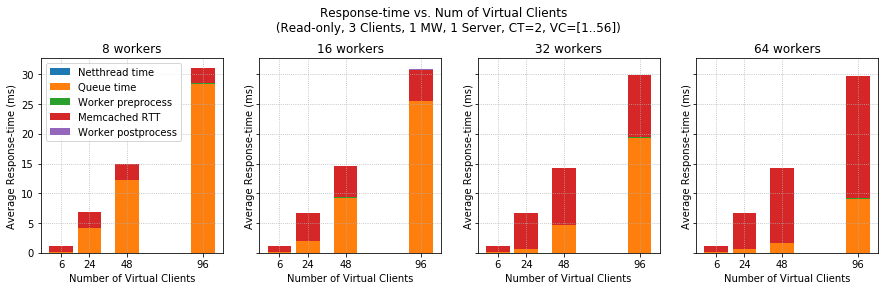

In [56]:
f, ax = plt.subplots(1, len(worker_list), sharex='col', sharey='row')
f.suptitle("Response-time vs. Num of Virtual Clients \n (Read-only, 3 Clients, 1 MW, 1 Server, CT=2, VC=[1..56])")
f.subplots_adjust(top=0.8)
f.set_figwidth(15)
i=0

for worker in worker_list:
    # extract values of interest
    df_b_cut = df_b[(df_b.worker == worker)]
    
    vcs = df_b_cut['client']
    net_time = df_b_cut['read_netthreadTime']
    queue_time = df_b_cut['read_queueTime']
    workerPreTime = df_b_cut['read_workerPreTime']
    memcachedRTT = df_b_cut['read_memcachedRTT']
    workerPostTime = df_b_cut['read_workerPostTime']

    width = 15       # the width of the bars: can also be len(x) sequence
    ax[i].bar(vcs, net_time, width, label='Netthread time')
    ax[i].bar(vcs, queue_time, width, bottom=net_time, label='Queue time')
    ax[i].bar(vcs, workerPreTime, width, bottom=net_time+queue_time, label='Worker preprocess')
    ax[i].bar(vcs, memcachedRTT, width, bottom=net_time+queue_time+workerPreTime, label='Memcached RTT')
    ax[i].bar(vcs, workerPostTime, width, bottom=net_time+queue_time+workerPreTime+memcachedRTT, label='Worker postprocess')

    ax[i].grid(linestyle = "dotted")
    ax[i].set_ylabel("Average Response-time (ms)")
    ax[i].set_xlabel("Number of Virtual Clients")
    ax[i].set_xticks([0] + np.array(vcs))
    ax[i].set_ylim(bottom=0)
    ax[i].set_title('{} workers'.format(worker))
    if i==0:
        ax[i].legend()
    
    i += 1

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/one_mw/"+date+"/one_mw_rt_breakdown_read.png", dpi = 150)


## Response-time breakdown histogram for write loads

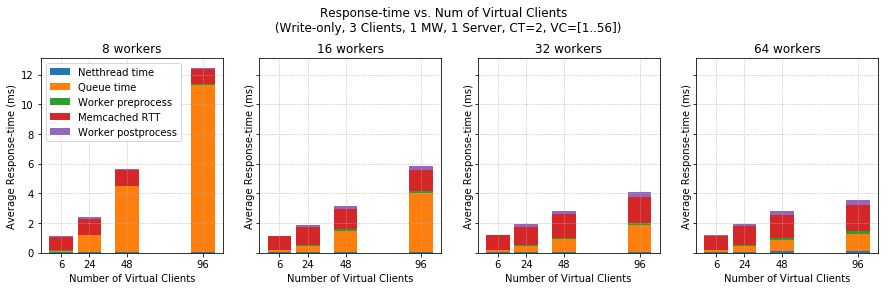

In [57]:
#f = plt.figure()
f, ax = plt.subplots(1, len(worker_list), sharex='col', sharey='row')
f.suptitle("Response-time vs. Num of Virtual Clients \n (Write-only, 3 Clients, 1 MW, 1 Server, CT=2, VC=[1..56])")
f.subplots_adjust(top=0.8)
f.set_figwidth(15)


i=0
for worker in worker_list:
    # extract values of interest
    df_b_cut = df_b[(df_b.worker == worker)]
    
    vcs = df_b_cut['client']
    net_time = df_b_cut['write_netthreadTime']
    queue_time = df_b_cut['write_queueTime']
    workerPreTime = df_b_cut['write_workerPreTime']
    memcachedRTT = df_b_cut['write_memcachedRTT']
    workerPostTime = df_b_cut['write_workerPostTime']

    width = 15       # the width of the bars: can also be len(x) sequence
    ax[i].bar(vcs, net_time, width, label='Netthread time')
    ax[i].bar(vcs, queue_time, width, bottom=net_time, label='Queue time')
    ax[i].bar(vcs, workerPreTime, width, bottom=net_time+queue_time, label='Worker preprocess')
    ax[i].bar(vcs, memcachedRTT, width, bottom=net_time+queue_time+workerPreTime, label='Memcached RTT')
    ax[i].bar(vcs, workerPostTime, width, bottom=net_time+queue_time+workerPreTime+memcachedRTT, label='Worker postprocess')

    ax[i].grid(linestyle = "dotted")
    ax[i].set_ylabel("Average Response-time (ms)")
    ax[i].set_xlabel("Number of Virtual Clients")
    ax[i].set_xticks([0] + np.array(vcs))
    ax[i].set_ylim(bottom=0)
    ax[i].set_title('{} workers'.format(worker))
    if i==0:
        ax[i].legend()
    
    i += 1

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/one_mw/"+date+"/one_mw_rt_breakdown_write.png", dpi = 150)
